# (12104) Chesley orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '12104'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = 0.0
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)

In [4]:
add_gaia_obs = True
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias_hires = False
debias_lowres = True
deweight = True
eliminate = False
max_obs_per_night = 4
verbose = True
obs_array_optical, observer_codes_optical = fit.get_mpc_optical_obs_array(body_id, optical_obs_file, t_min_tdb, t_max_tdb, debias_hires, debias_lowres, deweight, eliminate, max_obs_per_night, verbose)
obs_array_radar, observer_codes_radar = fit.get_radar_obs_array(body_id, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    obs_array_gaia, observer_codes_gaia = fit.get_gaia_optical_obs_array(body_id, de_kernel_path, t_min_tdb=None, t_max_tdb=None, verbose=True)
    obs_array_optical = np.vstack((obs_array_optical, obs_array_gaia))
    observer_codes_optical = observer_codes_optical + observer_codes_gaia

Skipped 28 observations 
	 28 of which were non-geocentric occultations or space-based observations, 
	 0 were either roving or radar observations (radar is handled separately), 
	 0 of which were outside the specified time range.
No debiasing needed for 1822 observations. Debiased 1273 observations. No biasing information for 10 observations.
Applied default weight of 1 arcsec to 153 CCD observations
Deweighted 800 observations as part of deweighting scheme.
Found 257 observations from Gaia DR3.
	 Added 32 of those observations.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, init_cov, obs_array_optical, observer_codes_optical, obs_array_radar, observer_codes_radar, n_iter_max=n_iter_max, de_kernel=de_kernel, de_kernel_path=de_kernel_path, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.428			 0.507			 1543.305			 0.246
2			 0.428			 0.505			 1544.271			 0.246
3			 0.428			 0.505			 1544.271			 0.246
Converged without rejecting outliers. Starting outlier rejection now.
4			 0.397			 0.458			 1247.942			 0.200
5			 0.397			 0.458			 1247.925			 0.200
Converged after rejecting outliers.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 5 (of 5):
RMS unweighted: 0.3972311942163293
RMS weighted: 0.4577513379571854
chi-squared: 1247.9245966611536
reduced chi-squared: 0.20030892402265707
square root of reduced chi-squared: 0.447558849786994
t: MJD 57747.0 TDB
Fitted Variable		Initial Value			Uncertainty			Fitted Value 			Uncertainty			Change				Change (sigma)
e			2.41663381933e-02		1.04627140790e-08 		2.41663437904e-02		1.00855569710e-08 		+5.59716246268e-09		+0.535
q			2.93823893665e+00		3.56230095612e-08 		2.93823892453e+00		3.43069882433e-08 		-1.21216454652e-08		-0.340
tp			5.68199298246e+04		1.13863320389e-04 		5.68199299408e+04		1.09461727771e-04 		+1.16242772492e-04		+1.021
om			7.80621900600e+01		3.59365037852e-07 		7.80621894094e+01		3.44153323235e-07 		-6.50635016086e-07		-1.811
w			1.82993622616e+02		2.04141793706e-05 		1.82993644772e+02		1.96130801750e-05 		+2.21563303171e-05		+1.085
i			1.11516133707e+01		2.06158828465e-07 		1.11516137560e+01		2.01559503027e

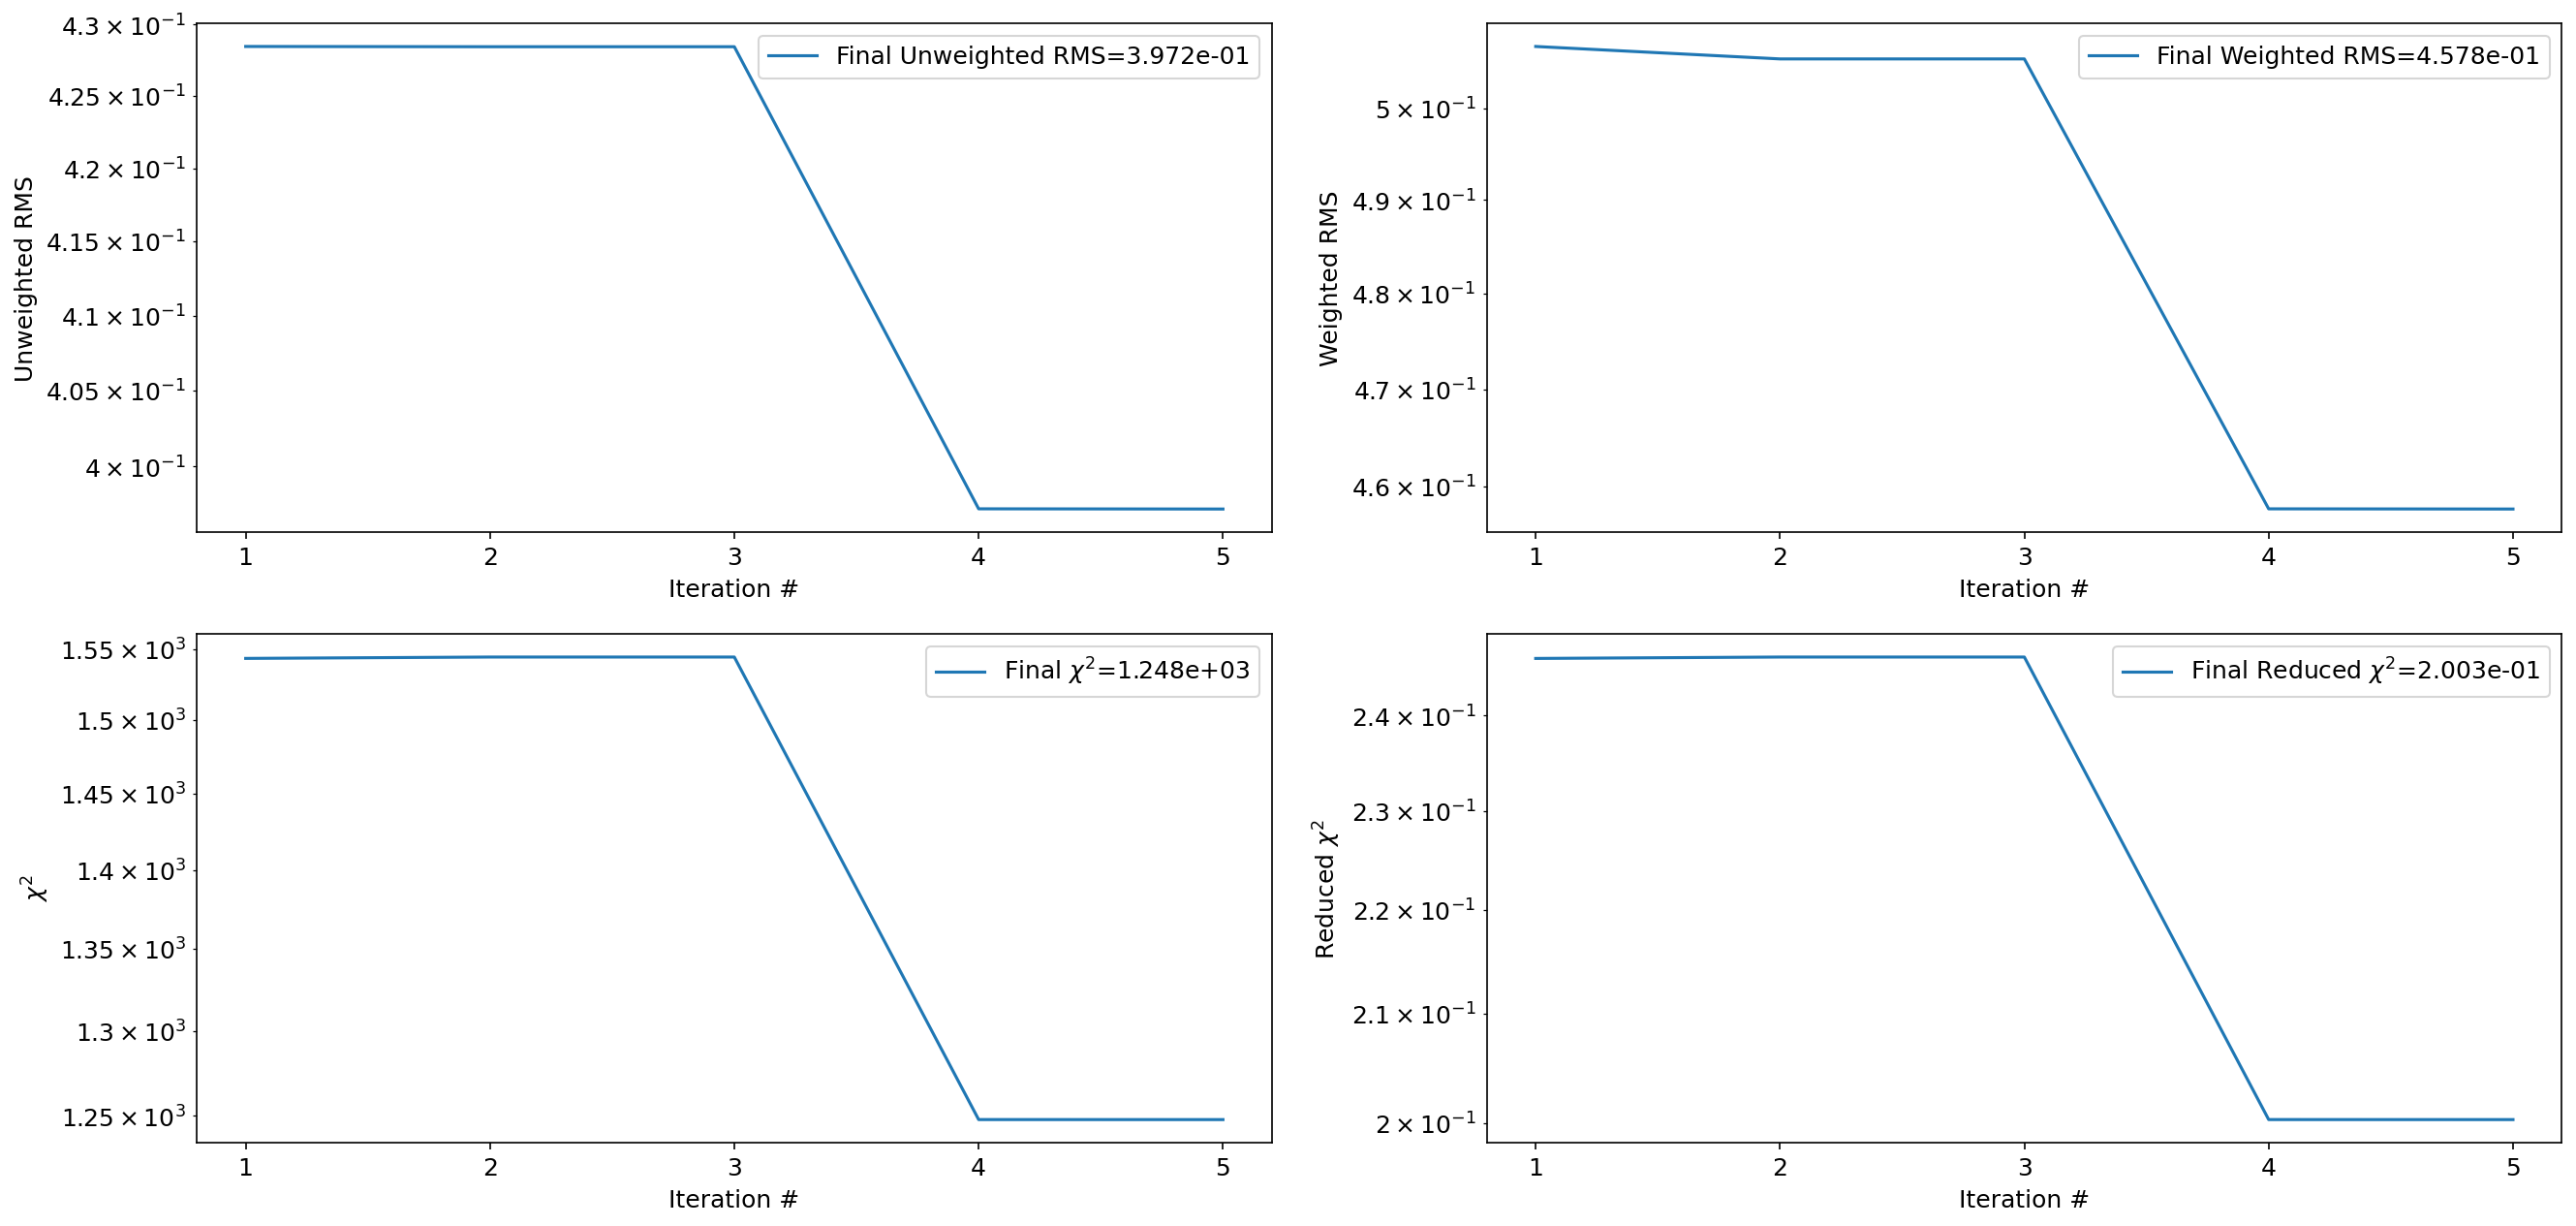

In [8]:
fit_sim.plot_summary(auto_close=True)

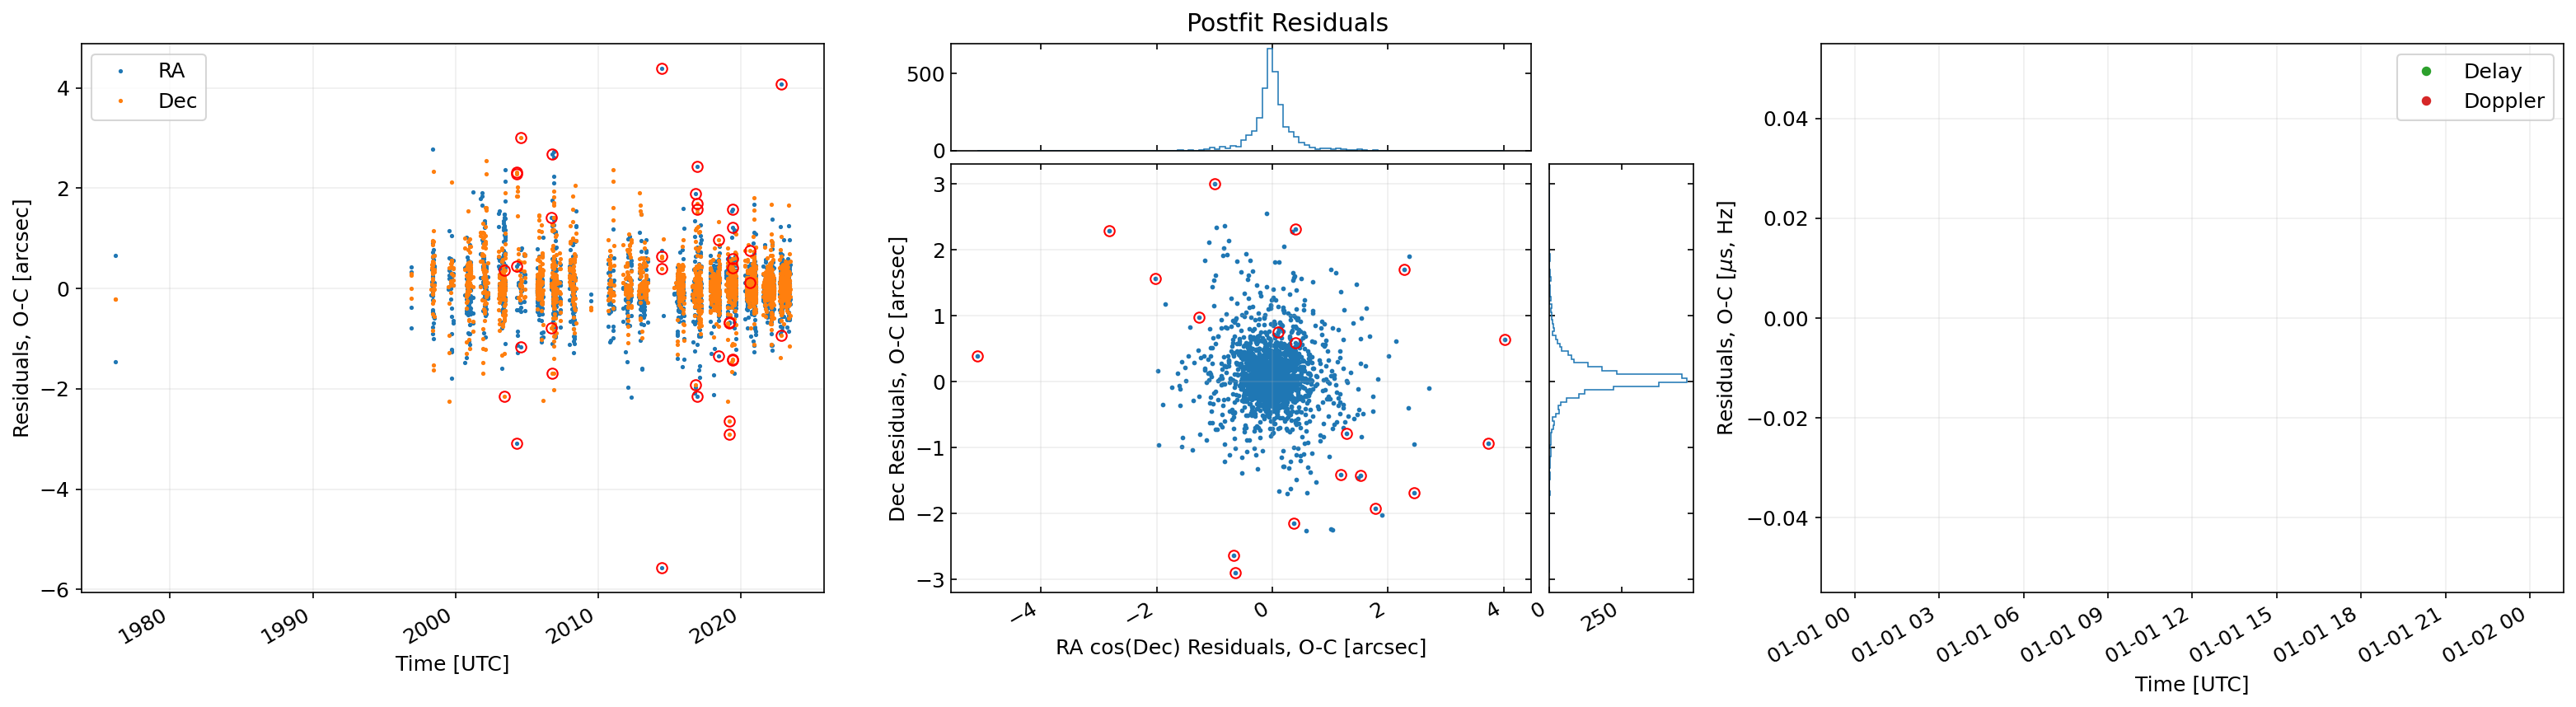

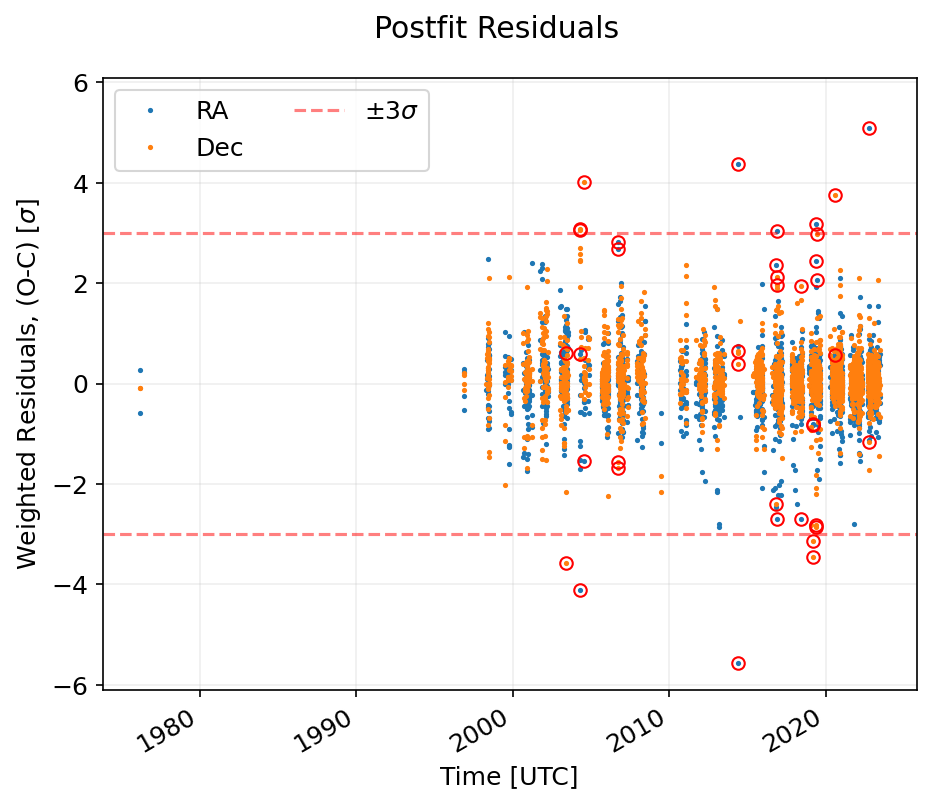

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 2.98
Mahalonobis distance between GRSS and JPL solution: 3.07
Bhattacharya distance between JPL and GRSS solution: 0.0023
Bhattacharya coefficient between JPL and GRSS solution: 0.9977


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90